<a href="https://colab.research.google.com/github/bunnghak/AI_05_Session2_Project/blob/main/AI_05_Session2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#install pandas-profiling and category encoders
%%capture
!pip install category_encoders
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install xgboost
!pip install eli5
!pip install pdpbox
!pip install shap
#need reluanch

#ignore warning xgboost

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [8]:
'''
Adults	Integer	Number of adults	BO and BL
Agent	Categorical	ID of the travel agency that made the booking	BO and BL
ArrivalDateDayOfMonth	Integer	Day of the month of the arrival date	BO and BL
ArrivalDateMonth	Categorical	Month of arrival date with 12 categories: “January” to “December”	BO and BL
ArrivalDateWeekNumber	Integer	Week number of the arrival date	BO and BL
ArrivalDateYear	Integer	Year of arrival date	BO and BL
AssignedRoomType	Categorical	Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons	BO and BL
Babies	Integer	Number of babies	BO and BL
BookingChanges	Integer	Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation	BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal
Children	Integer	Number of children	BO and BL/Sum of both payable and non-payable children
Company	Categorical	ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL.
Country	Categorical	Country of origin. Categories are represented in the ISO 3155–3:2013 format [6]	BO, BL and NT

CustomerType	Categorical	Type of booking, assuming one of four categories:	BO and BL
Contract - when the booking has an allotment or other type of contract associated to it;
Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking
DaysInWaitingList	Integer	Number of days the booking was in the waiting list before it was confirmed to the customer	BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS


DepositType	Categorical	Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:	BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date.
No Deposit – no deposit was made;
In case no payments were found the value is “No Deposit”.
If the payment was equal or exceeded the total cost of stay, the value is set as “Non Refund”.
Non Refund – a deposit was made in the value of the total stay cost;
Otherwise the value is set as “Refundable”
Refundable – a deposit was made with a value under the total cost of stay.
DistributionChannel	Categorical	Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”	BO, BL and DC
IsCanceled	Categorical	Value indicating if the booking was canceled (1) or not (0)	BO
IsRepeatedGuest	Categorical	Value indicating if the booking name was from a repeated guest (1) or not (0)	BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest
LeadTime	Integer	Number of days that elapsed between the entering date of the booking into the PMS and the arrival date	BO and BL/ Subtraction of the entering date from the arrival date
MarketSegment	Categorical	Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”	BO, BL and MS

Meal	Categorical	Type of meal booked. Categories are presented in standard hospitality meal packages:	BO, BL and ML
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)
PreviousBookingsNotCanceled	Integer	Number of previous bookings not cancelled by the customer prior to the current booking	BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled.
PreviousCancellations	Integer	Number of previous bookings that were cancelled by the customer prior to the current booking	BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled.
RequiredCardParkingSpaces	Integer	Number of car parking spaces required by the customer	BO and BL

ReservationStatusDate	Date	Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel	BO
ReservedRoomType	Categorical	Code of room type reserved. Code is presented instead of designation for anonymity reasons	BO and BL
StaysInWeekendNights	Integer	Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel	BO and BL/ Calculated by counting the number of weekend nights from the total number of nights
StaysInWeekNights	Integer	Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel	BO and BL/Calculated by counting the number of week nights from the total number of nights
TotalOfSpecialRequests	Integer	Number of special requests made by the customer (e.g. twin bed or high floor)	BO and BL/Sum of all special requests
'''

'\nAdults\tInteger\tNumber of adults\tBO and BL\nAgent\tCategorical\tID of the travel agency that made the booking\tBO and BL\nArrivalDateDayOfMonth\tInteger\tDay of the month of the arrival date\tBO and BL\nArrivalDateMonth\tCategorical\tMonth of arrival date with 12 categories: “January” to “December”\tBO and BL\nArrivalDateWeekNumber\tInteger\tWeek number of the arrival date\tBO and BL\nArrivalDateYear\tInteger\tYear of arrival date\tBO and BL\nAssignedRoomType\tCategorical\tCode for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons\tBO and BL\nBabies\tInteger\tNumber of babies\tBO and BL\nBookingChanges\tInteger\tNumber of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation\tBO and BL/Calculated by adding 

In [9]:
#hotel booking demand dataset으로 해보기로 함. 
#마침 설명란에도 EDA나 예측모델 만드는 연습하는데 좋다고 적어놓기도 했고, 데이터자체도 이것저것 사용해보기 좋게 만들어져있는 것 같음.
#참고 링크 : https://www.kaggle.com/jessemostipak/hotel-booking-demand 

import pandas as pd

data = 'https://www.dropbox.com/s/0t2gvf9zsnh3fwh/hotel_bookings.csv?dl=1' #앞으로의 작업의 수월함을 위해 dropbox에 업로드 후 끌어오기로 함.
df = pd.read_csv(data)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df,minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#report로 확인결과 결측치 빼고는 딱히 특이사항은 없어보임.
#high Cardinality 를 보이는 reservation date 와 country는 확인후 제거하던가 그룹화하던가 해서 낮추기로 하고.
#skewed 한 수치(babies,previous_cancellations,prvious_booking_not_canceled)들은 importance를 보고 정해야겠다.
#target을 hotel이나 canceled 중 하나를 정할 수 있을 것 같음. 이 중 canceled 가 조금 더 발표 등에 사용하기 좋은 target일 꺼 같아서 is_canceled를 target으로 결정.
#reservation_status 는 결국 is_canceled의 정보를 나타내는 feature이므로 leakage 방지를 위해 제거.

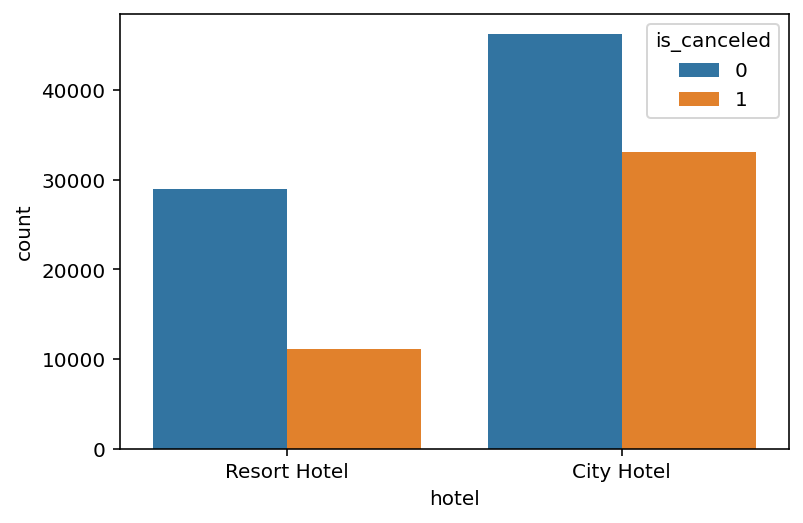

In [12]:
#hotel의 종류에 따른 캔슬률 비교.
import seaborn as sns
sns.countplot(data=df, x='hotel', hue='is_canceled')

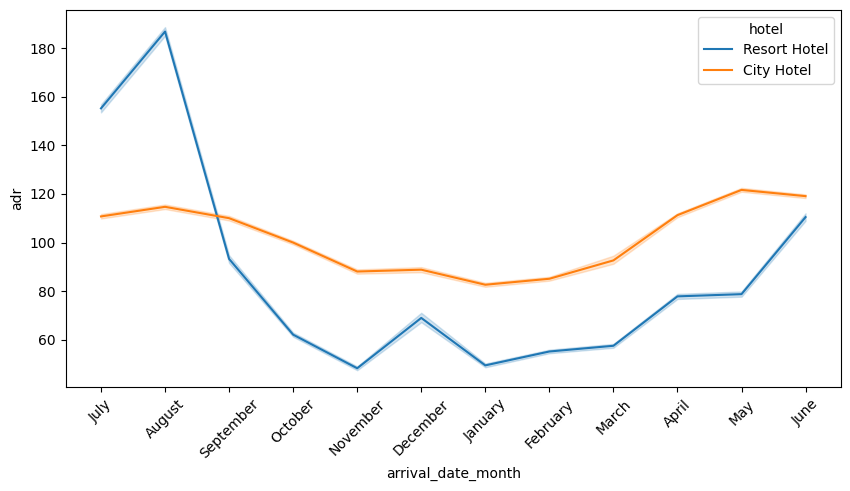

In [13]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(data=df, x= 'arrival_date_month', y = 'adr', hue='hotel',)
plt.xticks(rotation=45,fontsize=10);

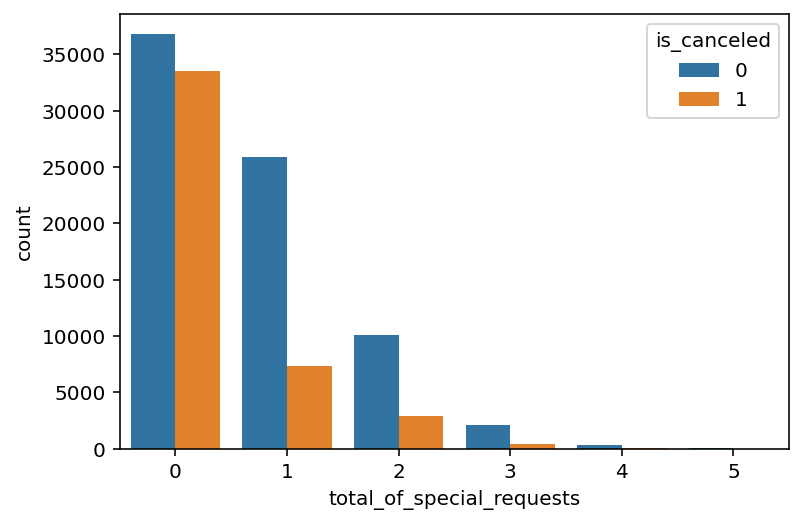

In [14]:
#특별 요청의 개수와 취소률에 대한 비율
sns.countplot(data=df, x= 'total_of_special_requests', hue='is_canceled')

In [15]:
df.reservation_status_date.value_counts() 
#예약한 날짜 데이터, 926가지나 되고, 이 feature에서 얻을 수 있는 것...을 생각해보면 같은 예약을 걸은 자료가 있는지 체크하는데 쓰고(중복치) feature를 제거하면 될 것 같다.

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-06-14       1
2015-03-05       1
2015-04-25       1
2015-05-15       1
2015-03-12       1
Name: reservation_status_date, Length: 926, dtype: int64

In [16]:
#target 설정.
target = ['is_canceled']
#reservation_status 제거
df1 = df.drop('reservation_status',axis=1)

df1 = df1.drop_duplicates().drop('reservation_status_date',axis=1)
#동일값 제거 후 reservation_status_date 열 제거.

#혹시 모를 결측치 확인.
[(x, df1[x].isnull().sum()) for x in df1.columns if df[x].isnull().any()]
#children은 imputer로 돌린다 치고, company는 거의 전체가 결측치이니 아예 제거해버리는게 좋을 듯.
#agent는 확인해보니 예약시 이용한 여행사의 고유ID인데, 이것이 nan 처리 되었다는 것은 결국 여행사를 안끼고 직접 예약을 했다는 소리이니 0으로 치환하면 될듯.
#country는 예약자의 국가 명인듯 싶다. 452개 정도면 전체의 0.5%정도인데... 문제는 high Cardinality한 feature(177)이다. 
#결측치를 하나의 수치로 안고서 인코딩을 거쳐 넣느냐, 아니면 해당 데이터들을 제거하고 돌리느냐는 내 선택인듯.

df1 = df1.drop(['country','company'],axis=1) #country, company 제거
df1['agent'] = df1['agent'].fillna('0') # agent의 결측치를 0 이라는 수치로 대체.

#country의 처리가 문제인데... 일단 시간이 없으므로 제거 한다고 치고, 안 제거 했을때의 해결방안만 적자.
#먼저 그룹화를 해야하는데, 제일 최선은 아시아,유럽,미대륙,아프리카,오세아니아 정도로 묶는게 최선일 것이다. 문제는 이걸 일일이 손으로 국가코드를 찾고 함수를 짜야한다는 것인데...어마무시한 시간이 들것같다. 

In [17]:
df1.is_canceled.value_counts(normalize=True)
#base model = 0.725118 -> 로지스틱으로 베이스라인 모델 변경.
#imbalanced함. wieght 떄 참고해서 넣을것.

0    0.725118
1    0.274882
Name: is_canceled, dtype: float64

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87394 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87394 non-null  object 
 1   is_canceled                     87394 non-null  int64  
 2   lead_time                       87394 non-null  int64  
 3   arrival_date_year               87394 non-null  int64  
 4   arrival_date_month              87394 non-null  object 
 5   arrival_date_week_number        87394 non-null  int64  
 6   arrival_date_day_of_month       87394 non-null  int64  
 7   stays_in_weekend_nights         87394 non-null  int64  
 8   stays_in_week_nights            87394 non-null  int64  
 9   adults                          87394 non-null  int64  
 10  children                        87390 non-null  float64
 11  babies                          87394 non-null  int64  
 12  meal                           

In [19]:
'''
대충 이걸로 모델을 위한 전처리 완료.
이제 모델을 작성해야 한다.
분류로 하되, 모델은 다양하게 여러개 돌려보면서 비교해보자.
후보는 
1. randomforest(bagging)
2. rogisticregression
3. xgboost(boosting)

이정도로 돌려보고, 일단 랜덤 포레스트로 중요도 뽑아보면서 어느정도 비교해보자.
'''

'\n대충 이걸로 모델을 위한 전처리 완료.\n이제 모델을 작성해야 한다.\n분류로 하되, 모델은 다양하게 여러개 돌려보면서 비교해보자.\n후보는 \n1. randomforest(bagging)\n2. rogisticregression\n3. xgboost(boosting)\n\n이정도로 돌려보고, 일단 랜덤 포레스트로 중요도 뽑아보면서 어느정도 비교해보자.\n'

In [20]:
from sklearn.model_selection import train_test_split

#train,test 분리.

train = df1.drop(target,axis=1)
test = df1[target]
X_train,X_test,y_train,y_test = train_test_split(train,test,train_size=0.8,test_size=0.2,random_state=8)

#train,val 분리.

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size=0.8,test_size=0.2,random_state=8)

In [21]:
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#랜덤 포레스트
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=8, n_jobs=-1)) 
])
#일단 전부 디폴트값으로 돌려보고 생각하자.

In [22]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('targetencoder',
                                  TargetEncoder(cols=['hotel',
                                                      'arrival_date_month',
                                                      'meal', 'market_segment',
                                                      'distribution_channel',
                                                      'reserved_room_type',
                                                      'assigned_room_type',
                                                      'deposit_type', 'agent',
                                                      'customer_type'],
                                                drop_invariant=False,
                                                handle_missing='value',
                                                handle_unknown='value',
                                        

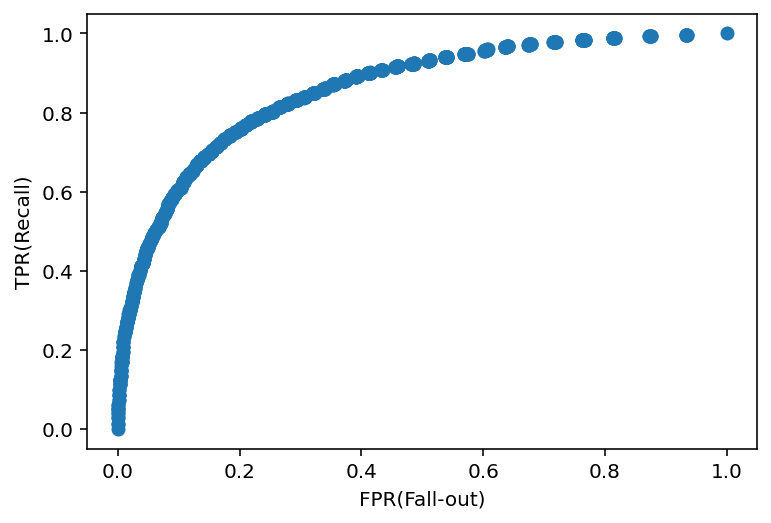

accuracy score: 0.8212829864835872
auc score: 0.8581019770943563


In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

#검증 스코어
y_pred_proba = pipe.predict_proba(X_val)[:,1]
fpr,tpr,thresholds = roc_curve(y_val,y_pred_proba)
plt.scatter(fpr,tpr)
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show()
print('accuracy score:',pipe.score(X_val,y_val))
print('auc score:',roc_auc_score(y_val,y_pred_proba))
#왜 이렇게 스코어가 좋지???? 그래프도 모양이 이쁘게 잘나옴...????

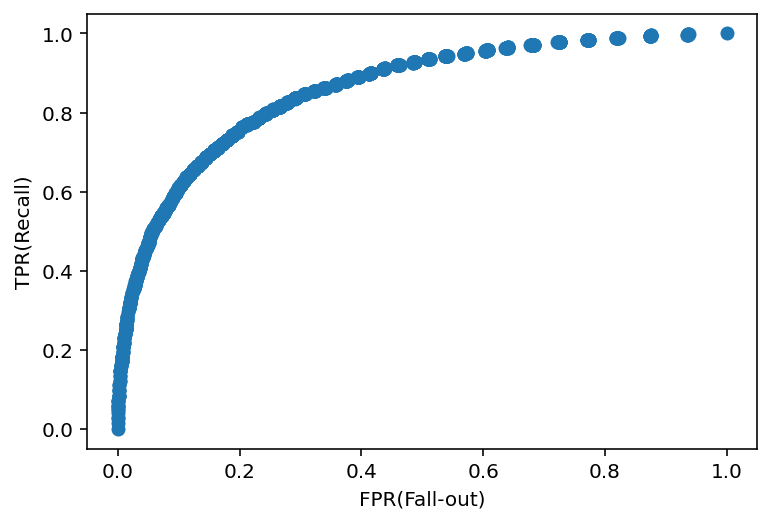

accuracy score: 0.8198409519995423
auc score: 0.8590029767006101


In [24]:
#테스트 스코어
y_pred_proba = pipe.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
plt.scatter(fpr,tpr)
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show()
print('accuracy score:',pipe.score(X_test,y_test))
print('auc score:',roc_auc_score(y_test,y_pred_proba))
#과적합도, 과소적합도 일어나지 않은 이쁜 상태가 나와버림. 좀 멍한데...

In [25]:
#로지스틱 회귀

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe_logi = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
)
pipe_logi.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('targetencoder',
                 TargetEncoder(cols=['hotel', 'arrival_date_month', 'meal',
                                     'market_segment', 'distribution_channel',
                                     'reserved_room_type', 'assigned_room_type',
                                     'deposit_type', 'agent', 'customer_type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothing=1.0, verbose=0)),...
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, ma

절편: -2.2043102207057728
검증 스코어: 0.8009726095973683
테스트 스코어: 0.7939813490474283


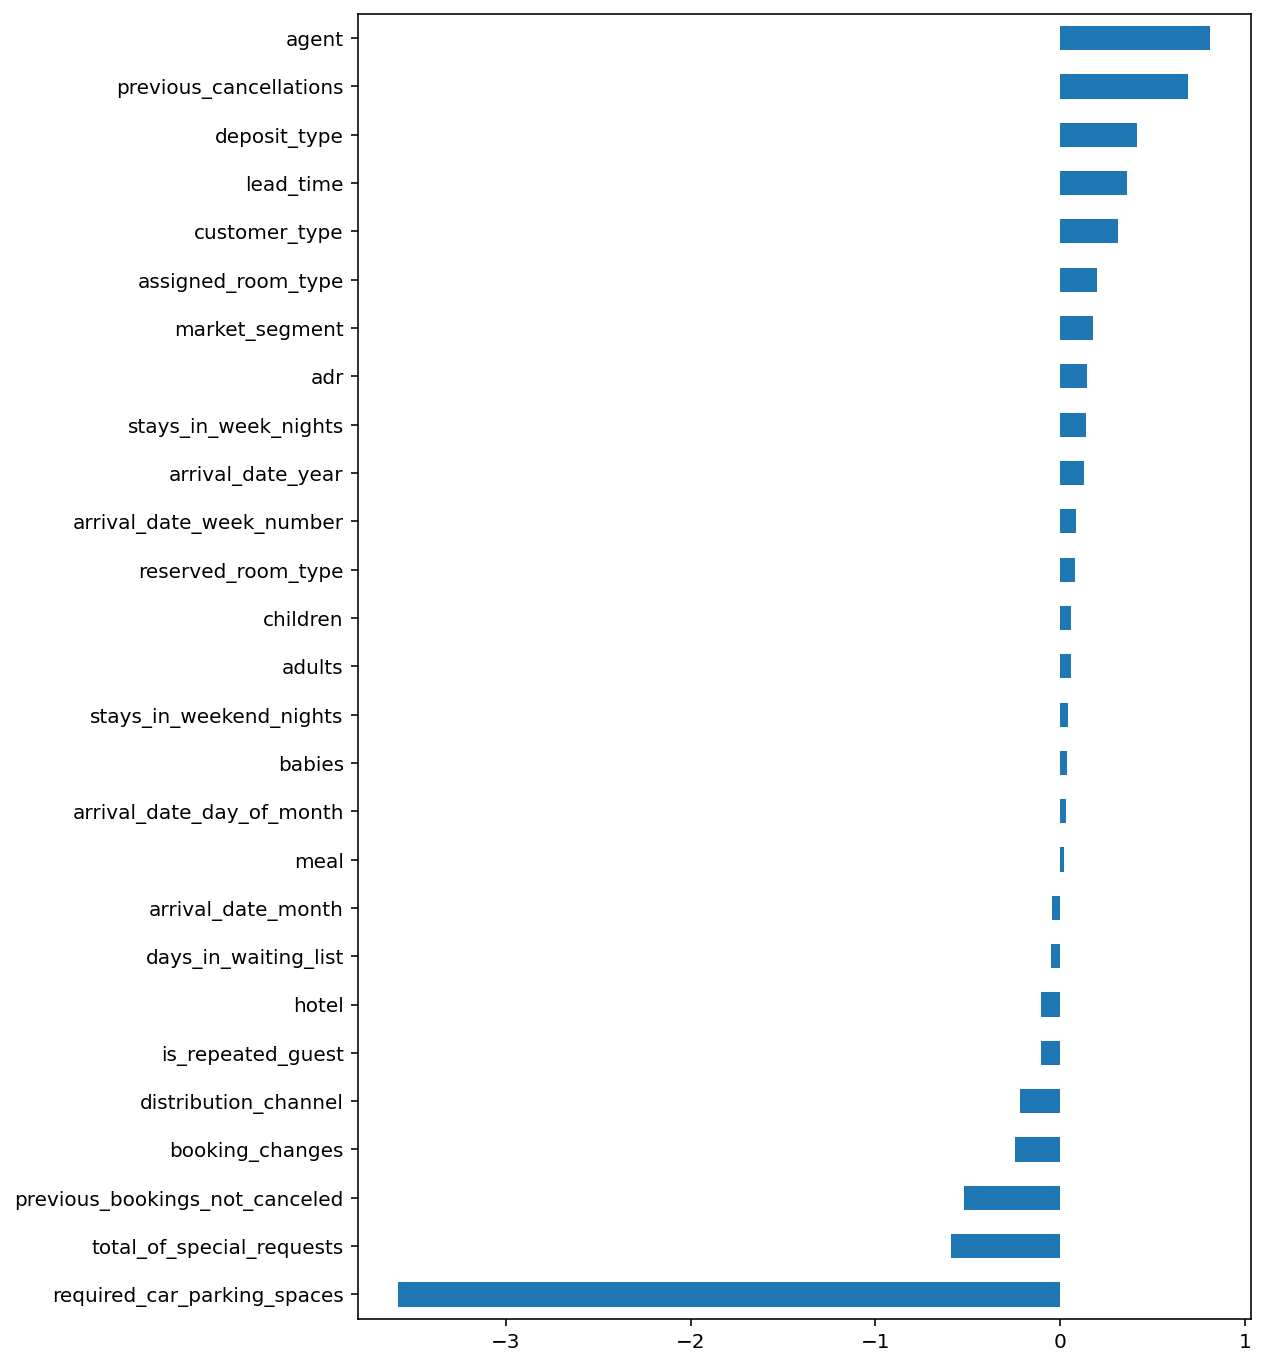

In [26]:
logi = pipe_logi.named_steps['logisticregression']
coefficients = pd.Series(logi.coef_[0], X_train.columns)
plt.figure(figsize=[8,12])
coefficients.sort_values().plot.barh();
print('절편:',logi.intercept_[0])
print('검증 스코어:',pipe_logi.score(X_val,y_val))
print('테스트 스코어:',pipe_logi.score(X_test,y_test))

In [27]:
#boosting
from xgboost import XGBClassifier


model_boost = XGBClassifier(random_state=8,
                  n_estimator=500
                  , n_jobs=-1)
X_train_transformed = pipe.named_steps['preprocessing'].transform(X_train)
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)
X_test_transformed = pipe.named_steps['preprocessing'].transform(X_test)
eval_set = [(X_train_transformed, y_train), 
            (X_val_transformed, y_val)]

model_boost.fit(X_train_transformed,y_train,
               eval_set=eval_set,
               eval_metric='error', # #(wrong cases)/#(all cases)
               early_stopping_rounds=50
               )

[0]	validation_0-error:0.223396	validation_1-error:0.230065
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.220607	validation_1-error:0.226704
[2]	validation_0-error:0.21805	validation_1-error:0.222627
[3]	validation_0-error:0.219284	validation_1-error:0.22463
[4]	validation_0-error:0.217496	validation_1-error:0.222127
[5]	validation_0-error:0.216495	validation_1-error:0.221126
[6]	validation_0-error:0.211614	validation_1-error:0.216334
[7]	validation_0-error:0.2119	validation_1-error:0.21662
[8]	validation_0-error:0.206072	validation_1-error:0.210041
[9]	validation_0-error:0.206036	validation_1-error:0.210112
[10]	validation_0-error:0.206018	validation_1-error:0.209826
[11]	validation_0-error:0.206018	validation_1-error:0.209755
[12]	validation_0-error:0.205607	validation_1-error:0.208825
[13]	validation_0-error:0.204784	validation_1-error:0.207967


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=500,
              n_estimators=100, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=8, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

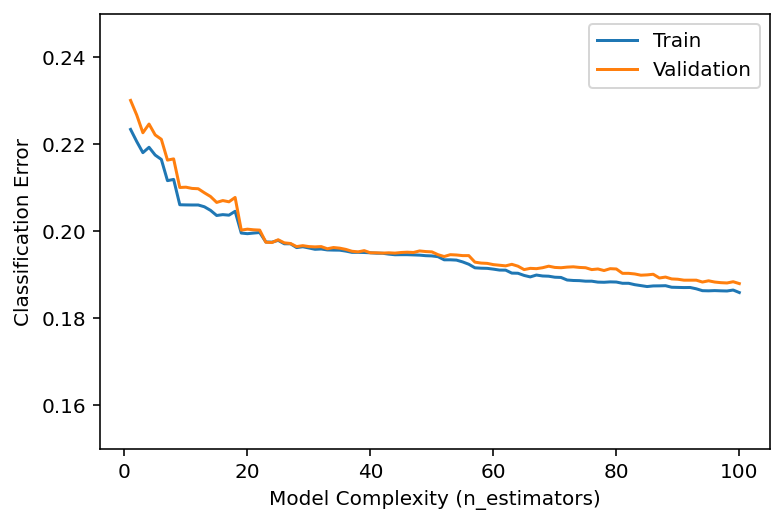

In [28]:
results = model_boost.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.15, 0.25)) # Zoom in
plt.legend();

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#검증 정확도, 분류.
y_pred = model_boost.predict(X_val_transformed)
print('검증 정확도: ', accuracy_score(y_val, y_pred))
print(classification_report(y_pred, y_val))

검증 정확도:  0.8120574983909032
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     11652
           1       0.46      0.75      0.57      2331

    accuracy                           0.81     13983
   macro avg       0.70      0.79      0.73     13983
weighted avg       0.86      0.81      0.83     13983



In [30]:
#f1 score
from sklearn.metrics import f1_score

print(f'logistic vali:{f1_score(y_val,pipe_logi.predict(X_val))}')
print(f'logistic test:{f1_score(y_test,pipe_logi.predict(X_test))}')
print(f'random forest vali:{f1_score(y_val,pipe.predict(X_val))}')
print(f'random forest test :{f1_score(y_test,pipe.predict(X_test))}')
print(f'boost vali:{f1_score(y_val,model_boost.predict(X_val_transformed))}')
print(f'boost test :{f1_score(y_test,model_boost.predict(X_test_transformed))}')

logistic vali:0.5571996817820207
logistic test:0.5518357187305538
random forest vali:0.6281803303079899
random forest test :0.6321691391192618
boost vali:0.5705882352941176
boost test :0.5700076511094109


In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

#permutation importance

permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=5, 
    random_state=2
)

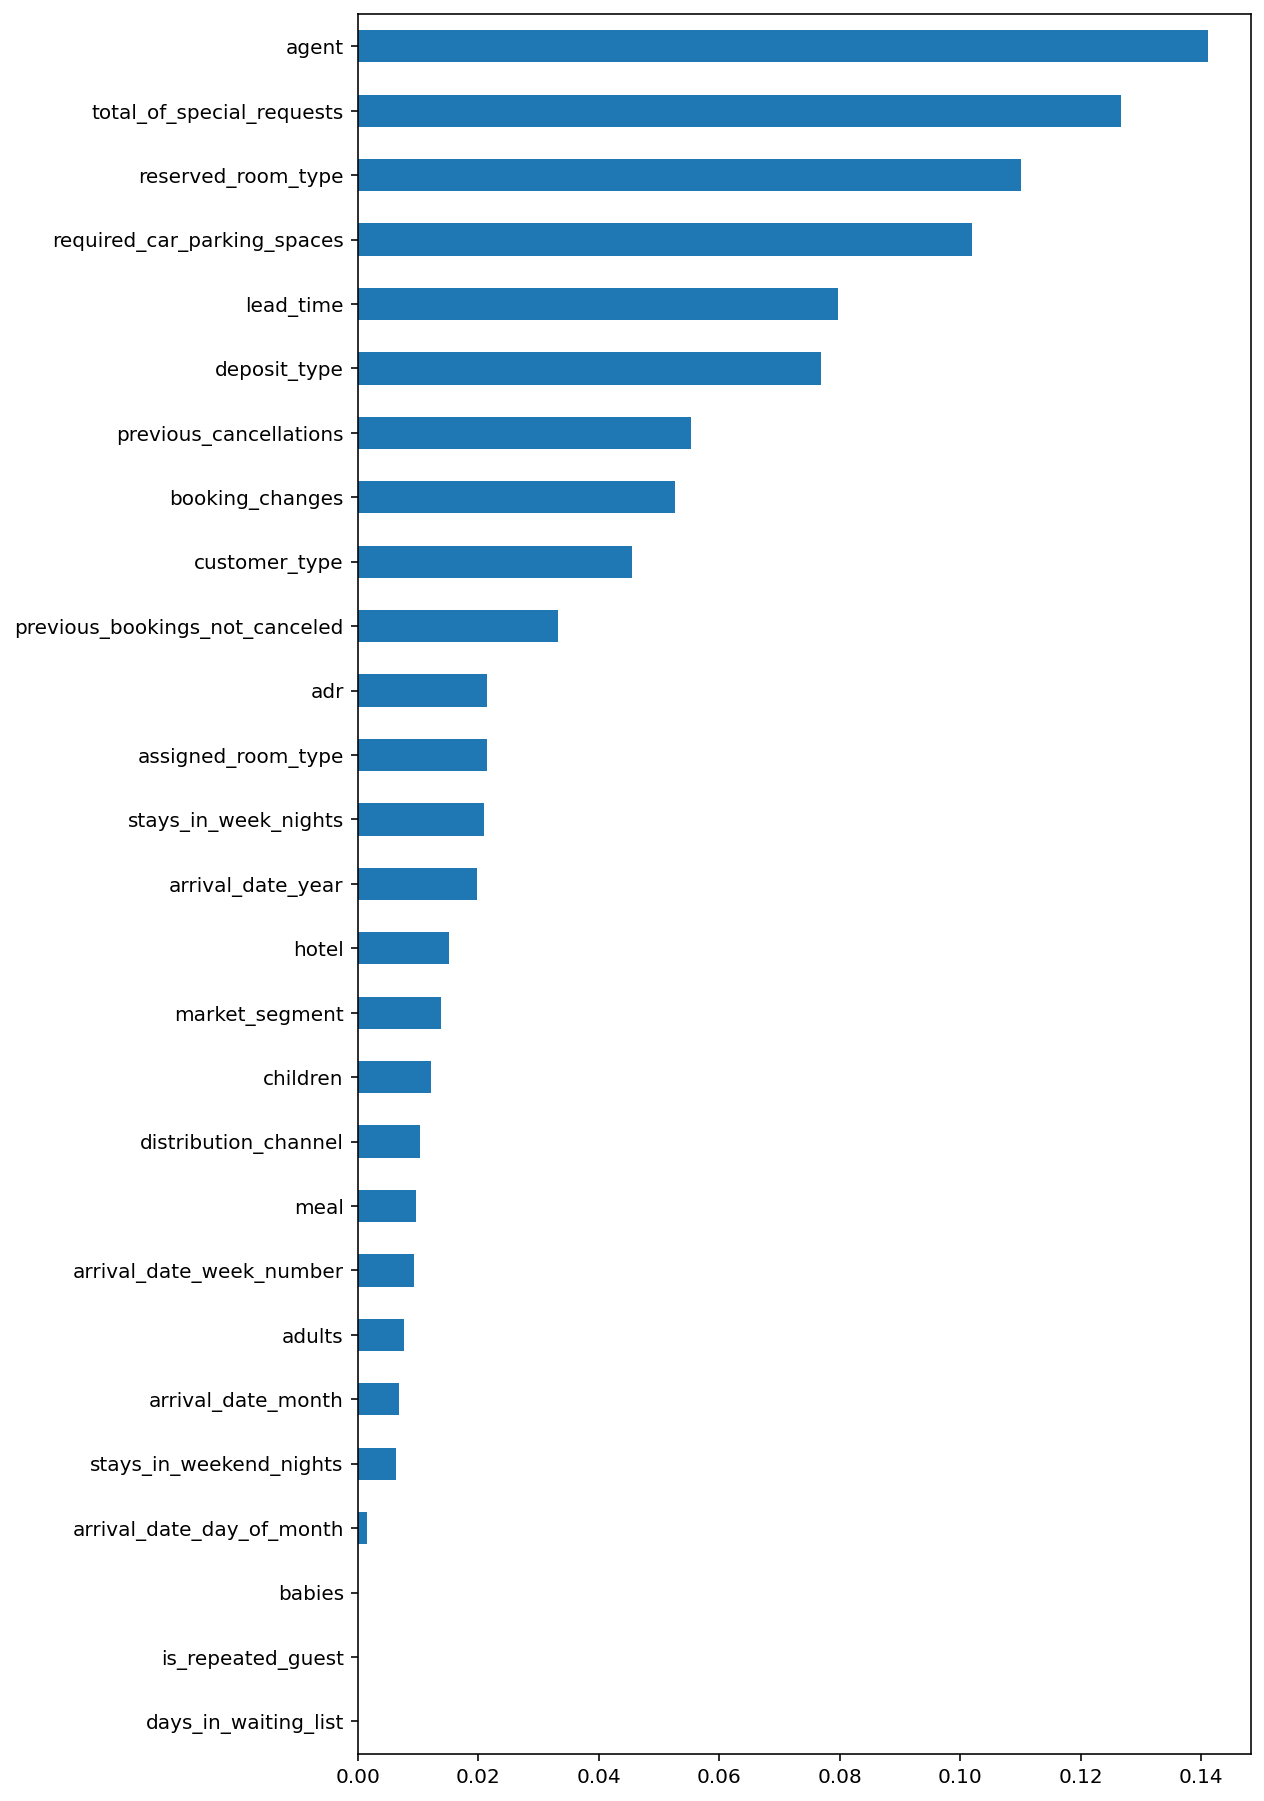

In [32]:
importances = pd.Series(model_boost.feature_importances_, X_train.columns)
plt.figure(figsize=[8,16])
importances.sort_values().plot.barh();


In [33]:
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)
permuter.fit(X_val_transformed, y_val);

feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.0514 ± 0.0040,total_of_special_requests
0.0420 ± 0.0047,agent
0.0333 ± 0.0026,lead_time
0.0155 ± 0.0014,previous_cancellations
0.0152 ± 0.0026,required_car_parking_spaces
0.0152 ± 0.0018,customer_type
0.0103 ± 0.0017,assigned_room_type
0.0088 ± 0.0013,deposit_type
0.0082 ± 0.0020,market_segment
0.0071 ± 0.0010,booking_changes


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np
#parameter tuning(random forest)
l1= np.arange (0,1,0.05)
l2= np.arange (0,1,0.05)
dists = {
    'rf__n_estimators': randint(50, 500), 
    'rf__max_depth': [5, 10, 15, 20], 
    'rf__min_samples_leaf' : randint(2,10),
    'rf__class_weight': [{0 : i, 1 : 1-i} for i in l1]
}

clf= RandomizedSearchCV(
    pipe,
    param_distributions=dists,
    n_iter=50,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)


In [35]:
%%time
clf.fit(X_train,y_train)

CPU times: user 35.4 s, sys: 1.28 s, total: 36.7 s
Wall time: 21min 21s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              Pipeline(memory=None,
                                                       steps=[('targetencoder',
                                                               TargetEncoder(cols=['hotel',
                                                                                   'arrival_date_month',
                                                                                   'meal',
                                                                                   'market_segment',
                                                                                   'distribution_channel',
                                                                                   'reserved_room_type',
                                                                                   'assigned_ro

In [36]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'rf__class_weight': {0: 0.45, 1: 0.55}, 'rf__max_depth': 15, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 175}
MAE:  0.18025459486519346


In [37]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T


,17,8,10,13,20,2,43,35,23,9,15,25,24,45,18,47,32,36,34,46,11,14,30,4,19,16,38,48,6,1,44,37,26,40,33,41,49,31,21,39,28,7,27,42,3,5,22,12,29,0
mean_fit_time,13.9081,21.823,22.1193,8.54839,37.0359,16.9166,25.1802,16.0898,23.5923,12.4763,19.0666,7.55093,19.3489,21.8051,9.40949,14.1497,11.3007,14.0794,24.6046,10.5969,23.9496,34.0777,8.29317,34.2288,7.44272,26.2135,26.8538,12.9591,17.2282,4.12791,9.46572,9.21749,4.09917,5.44595,28.1302,10.1318,13.2294,6.85637,7.95294,31.8576,8.30337,26.3752,5.09868,4.74758,19.2558,21.2754,5.65326,3.13601,4.33752,3.00846
std_fit_time,0.411454,0.153479,0.239593,0.119079,0.780998,0.285497,0.593047,0.235111,0.169299,0.102959,0.518985,0.136259,0.402043,0.13341,0.170452,0.262369,0.154088,0.162489,0.3756,0.456283,0.779541,0.38268,0.229814,0.566102,0.159519,0.537619,0.138551,0.255205,0.102442,0.194025,0.43653,0.143191,0.393655,0.326481,0.0938013,0.38199,3.25558,0.221305,0.0836488,0.119987,0.245463,0.382131,0.144335,0.326139,0.149669,0.403846,0.250925,0.154251,0.250713,0.0666721
mean_score_time,1.21499,1.83336,2.02505,0.835347,2.96994,1.29237,1.91007,1.41516,1.84309,1.19107,1.55422,0.680053,1.53361,1.7356,0.878237,1.18237,0.946766,1.18127,2.06922,1.01011,1.89993,2.81264,0.695653,2.6868,0.748474,2.1596,2.22944,1.07172,1.55447,0.428596,0.89392,0.873923,0.437178,0.518269,2.10978,0.992153,1.09555,0.638176,0.781683,2.52223,0.807378,2.07153,0.572475,0.574822,1.53077,1.68867,0.560309,0.346392,0.600778,0.502427
std_score_time,0.0318629,0.0999053,0.171377,0.134938,0.0974844,0.0713479,0.133934,0.0556094,0.127419,0.0185063,0.0754175,0.0733379,0.146417,0.0499755,0.041354,0.0320124,0.0416511,0.0509054,0.0700527,0.0294465,0.0787958,0.0920101,0.0102806,0.142748,0.0954556,0.0471375,0.0953544,0.0569167,0.0809112,0.0500859,0.0350197,0.0281258,0.0103808,0.0424291,0.0768529,0.105771,0.314511,0.126246,0.0193229,0.185738,0.10203,0.105531,0.0470038,0.0229884,0.0210248,0.0672898,0.0635793,0.0406573,0.00391438,0.0785649
param_rf__class_weight,"{0: 0.45, 1: 0.55}","{0: 0.45, 1: 0.55}","{0: 0.5, 1: 0.5}","{0: 0.6000000000000001, 1: 0.3999999999999999}","{0: 0.35000000000000003, 1: 0.6499999999999999}","{0: 0.4, 1: 0.6}","{0: 0.4, 1: 0.6}","{0: 0.65, 1: 0.35}","{0: 0.45, 1: 0.55}","{0: 0.35000000000000003, 1: 0.6499999999999999}","{0: 0.5, 1: 0.5}","{0: 0.35000000000000003, 1: 0.6499999999999999}","{0: 0.55, 1: 0.44999999999999996}","{0: 0.6000000000000001, 1: 0.3999999999999999}","{0: 0.45, 1: 0.55}","{0: 0.35000000000000003, 1: 0.6499999999999999}","{0: 0.5, 1: 0.5}","{0: 0.65, 1: 0.35}","{0: 0.75, 1: 0.25}","{0: 0.9, 1: 0.09999999999999998}","{0: 0.7000000000000001, 1: 0.29999999999999993}","{0: 0.9, 1: 0.09999999999999998}","{0: 0.75, 1: 0.25}","{0: 0.9500000000000001, 1: 0.04999999999999993}","{0: 0.8, 1: 0.19999999999999996}","{0: 0.9, 1: 0.09999999999999998}","{0: 0.15000000000000002, 1: 0.85}","{0: 0.6000000000000001, 1: 0.3999999999999999}","{0: 0.65, 1: 0.35}","{0: 0.7000000000000001, 1: 0.29999999999999993}","{0: 0.65, 1: 0.35}","{0: 0.8, 1: 0.19999999999999996}","{0: 0.30000000000000004, 1: 0.7}","{0: 0.8500000000000001, 1: 0.1499999999999999}","{0: 0.25, 1: 0.75}","{0: 0.1, 1: 0.9}","{0: 0.25, 1: 0.75}","{0: 0.25, 1: 0.75}","{0: 0.1, 1: 0.9}","{0: 0.1, 1: 0.9}","{0: 0.2, 1: 0.8}","{0: 0.15000000000000002, 1: 0.85}","{0: 0.15000000000000002, 1: 0.85}","{0: 0.1, 1: 0.9}","{0: 0.05, 1: 0.95}","{0: 0.05, 1: 0.95}","{0: 0.05, 1: 0.95}","{0: 0.05, 1: 0.95}","{0: 0.0, 1: 1.0}","{0: 0.0, 1: 1.0}"
param_rf__max_depth,15,15,20,20,20,10,10,20,10,15,10,15,10,10,5,10,5,10,15,20,10,20,10,15,10,10,20,5,5,5,5,5,5,5,10,20,5,5,20,15,5,10,10,10,10,10,5,5,15,10
param_rf__min_samples_leaf,2,4,7,6,7,3,6,4,9,2,5,6,9,8,8,6,8,9,3,4,3,8,4,3,2,6,6,6,5,8,3,3,5,5,4,3,2,8,8,6,4,8,5,7,6,9,3,5,4,3
param_rf__n_estimators,175,286,268,95,462,292,473,188,406,157,318,94,323,406,260,255,321,248,320,123,417,412,134,442,122,459,333,384,481,108,268,264,96,149,490,121,456,178,83,449,227,455,79,77,347,361,143,61,331,219
params,"{'rf__class_weight': {0: 0.45, 1: 0.5

In [38]:
pipe_random = clf.best_estimator_
rank = pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').iloc[:5] #randomized 에서 상위 3개만 픽업
rank = rank[rank.columns[rank.columns.str.contains('param')]].iloc[:,:-1] #param 만 남기고 제거.
rank


,param_rf__class_weight,param_rf__max_depth,param_rf__min_samples_leaf,param_rf__n_estimators
17,"{0: 0.45, 1: 0.55}",15,2,175
8,"{0: 0.45, 1: 0.55}",15,4,286
10,"{0: 0.5, 1: 0.5}",20,7,268
13,"{0: 0.6000000000000001, 1: 0.3999999999999999}",20,6,95
20,"{0: 0.35000000000000003, 1: 0.6499999999999999}",20,7,462


In [39]:
#위의 결과를 기반으로 그리드 서치 실시.


from sklearn.model_selection import GridSearchCV
dists = {
    'rf__min_samples_leaf': [3,5,8],     
    'rf__n_estimators': rank['param_rf__n_estimators'].to_list(), 
    'rf__max_depth': [15,20], 
}
G_clf = GridSearchCV(
    pipe_random, 
    param_grid=dists, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)



In [40]:
%%time

G_clf.fit(X_train,y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 15.8min finished


CPU times: user 22.6 s, sys: 768 ms, total: 23.3 s
Wall time: 15min 54s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        Pipeline(memory=None,
                                                 steps=[('targetencoder',
                                                         TargetEncoder(cols=['hotel',
                                                                             'arrival_date_month',
                                                                             'meal',
                                                                             'market_segment',
                                                                             'distribution_channel',
                                                                             'reserved_room_type',
                                                                             'assigned_room_type',
                                                              

In [41]:
pd.DataFrame(G_clf.cv_results_).sort_values(by='rank_test_score').T


,18,15,16,17,20,21,19,22,24,23,0,2,4,26,1,28,3,29,6,8,25,27,7,5,11,9,12,14,10,13
mean_fit_time,8.08045,15.0254,23.7241,21.5177,14.0147,22.5531,36.7217,21.1116,35.584,8.15717,13.071,19.1584,32.7172,21.5757,20.3014,7.79634,7.35433,29.7952,20.1335,7.2453,13.482,20.8097,18.8467,12.9702,20.0071,31.7937,18.5381,31.5416,12.7615,7.16527
std_fit_time,0.184354,0.640454,0.0558827,0.243014,0.507361,0.146704,0.485557,0.0903528,0.541595,0.0225094,0.0813024,0.514863,0.628218,0.243939,0.0753857,0.178728,0.392927,8.45687,0.10288,0.161838,0.275109,0.189207,0.185587,0.589888,0.270456,0.693642,0.181521,0.496113,0.262457,0.139864
mean_score_time,0.762367,1.29663,2.07427,1.9293,1.32941,1.97084,3.06495,1.73794,2.85915,0.622428,1.12261,1.61188,2.69923,1.87653,1.77761,0.69452,0.780557,2.36156,1.67033,0.658418,1.20014,1.8508,1.60171,1.13895,1.80442,2.56331,1.66937,2.51859,1.17336,0.638823
std_score_time,0.0146384,0.12658,0.0492392,0.0503977,0.0475286,0.0490105,0.0824337,0.0480137,0.127174,0.0524914,0.0485627,0.0602718,0.180616,0.112815,0.0965481,0.0907858,0.0314359,0.739823,0.0370822,0.0837151,0.127551,0.0535119,0.107431,0.0703672,0.147267,0.128038,0.0716159,0.231636,0.0677724,0.0500771
param_rf__max_depth,20,20,20,20,20,20,20,20,20,20,15,15,15,20,15,20,15,20,15,15,20,20,15,15,15,15,15,15,15,15
param_rf__min_samples_leaf,3,3,3,3,5,5,3,5,5,5,3,3,3,8,3,8,3,8,5,5,8,8,5,5,8,5,8,8,8,8
param_rf__n_estimators,95,175,286,268,175,286,462,268,462,95,175,268,462,286,286,95,95,462,286,95,175,268,268,175,286,462,268,462,175,95
params,"{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 20, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ...","{'rf__max_depth': 15, 'rf__min_samples_leaf': ..."
split0_test_score,-0.176464,-0.177859,-0.177322,-0.177108,-0.176947,-0.177483,-0.178181,-0.177537,-0.178181,-0.177215,-0.179575,-0.179522,-0.179629,-0.179146,-0.179843,-0.179468,-0.179307,-0.179361,-0.180058,-0.179897,-0.179522,-0.179414,-0.180004,-0.180004,-0.180112,-0.180272,-0.180058,-0.179951,-0.179843,-0.180916
split1_test_score,-0.17684,-0.177644,-0.178771,-0.178985,-0.178878,-0.178717,-0.179146,-0.178771,-0.178717,-0.179039,-0.178502,-0.179414,-0.179307,-0.179039,-0.179736,-0.178878,-0.179468,-0.179629,-0.179468,-0.179361,-0.179951,-0.179682,-0.179843,-0.180112,-0.18038,-0.180004,-0.180648,-0.180433,-0.180058,-0.180648


In [42]:
pipe_grid = G_clf.best_estimator_
#tuning 후 최종 스코어.
print(f'randomized test:{f1_score(y_test,pipe_random.predict(X_test))}')
print(f'randomgrid test :{f1_score(y_test,pipe_grid.predict(X_test))}')

randomized test:0.6121856866537718
randomgrid test :0.6345135866368662


In [43]:
y_pred = pipe_grid.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))
print(classification_report(y_pred, y_val))

검증 정확도:  0.8232854180075806
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     11133
           1       0.55      0.73      0.63      2850

    accuracy                           0.82     13983
   macro avg       0.74      0.79      0.76     13983
weighted avg       0.85      0.82      0.83     13983



In [44]:
#부스팅도 한번 tuning 실시.

#parameter tuning(boosting)
l1= np.arange (0,1,0.05)
dists = {
    'XGBClassifier__n_estimators': randint(50, 500), 
    'XGBClassifier__max_depth': [5, 10, 15, 20], 
    'XGBClassifier__learning_rate' : np.arange(0,1,0.1),
    'XGBClassifier__scale_pos_weight': np.arange(0,1,0.05)
}

clf= RandomizedSearchCV(
    model_boost,
    param_distributions=dists,
    n_iter=50,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)


In [45]:
%%time
clf.fit(X_train_transformed,y_train)

CPU times: user 10.8 s, sys: 357 ms, total: 11.2 s
Wall time: 6min 12s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimator=500,
                                           n_estimators=100, n_jobs=-1,
                                           nthread=None,
                                           objective='binary:logistic',
                                           random_state=8, reg_alpha=...
                                        'XGBClassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f16c84be110>,
                                   

In [46]:
model_boost_random = clf.best_estimator_
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T


최적 하이퍼파라미터:  {'XGBClassifier__learning_rate': 0.6000000000000001, 'XGBClassifier__max_depth': 20, 'XGBClassifier__n_estimators': 50, 'XGBClassifier__scale_pos_weight': 0.05}
MAE:  0.18717371093470644


,0,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,26,25,24,23,1,2,3,4,5,6,7,8,9,10,48,11,13,14,15,16,17,18,19,20,21,22,12,49
mean_fit_time,4.85084,4.77151,4.78336,4.78388,4.77155,4.77781,4.77294,4.81711,4.78022,4.89914,4.90317,4.94159,4.86215,4.89464,4.90671,5.00201,4.88223,4.93831,4.84694,4.88116,4.86651,4.83355,4.74213,4.77585,4.76022,4.75652,4.79929,4.79577,4.7605,4.77709,4.74386,4.80862,4.80003,4.77751,4.79552,4.79601,4.85085,4.78254,4.78213,4.78607,4.82852,4.72167,4.78939,4.7766,4.77737,4.75248,4.77843,4.76474,4.81308,4.79949
std_fit_time,0.0741145,0.027812,0.00890933,0.0342019,0.0231136,0.0242001,0.00593636,0.0235427,0.0175543,0.0828623,0.00955433,0.070229,0.0300933,0.022081,0.0393118,0.0411382,0.00695341,0.0358276,0.026138,0.0257312,0.0308224,0.0122296,0.0307121,0.0200756,0.0270531,0.044409,0.037343,0.0155394,0.00406199,0.0442948,0.026332,0.0307736,0.0072071,0.0230792,0.0153296,0.0628175,0.0202537,0.0231885,0.0201656,0.037711,0.0260831,0.0271912,0.0118847,0.0114192,0.0484368,0.0102519,0.0306313,0.0461322,0.019664,0.154178
mean_score_time,0.0794964,0.0793445,0.0790238,0.0800428,0.0786482,0.0781651,0.0780534,0.0792516,0.0784518,0.085506,0.0795785,0.0798321,0.0832462,0.0799831,0.0822328,0.0824202,0.0806361,0.087211,0.0814309,0.0802453,0.0801389,0.0784905,0.0800993,0.0792755,0.0813876,0.079242,0.0878092,0.0865028,0.0886081,0.0862075,0.0791183,0.0782945,0.0796235,0.0798927,0.0835603,0.0791736,0.0799101,0.0810993,0.0801614,0.0779416,0.0800827,0.079613,0.0780582,0.0790215,0.0832388,0.0830094,0.0802856,0.078263,0.0820614,0.0732689
std_score_time,0.00150799,0.00124045,0.000657951,0.00139591,0.000923042,0.000556724,0.000456932,0.000827403,0.000415361,0.00622292,0.00111432,0.000660761,0.0057742,0.000907755,0.00180492,0.003416,0.00262625,0.00548151,0.00419339,0.00166496,0.00111178,0.00071339,0.00202729,0.000978105,0.00245549,0.000282484,0.00799866,0.00437573,0.00798323,0.00493337,0.00113895,0.000903696,0.00130025,0.00124903,0.0050192,0.000645305,0.00138995,0.00481407,0.00104786,0.000940882,0.00243329,0.0029433,0.00103047,0.00108597,0.00665347,0.0066348,0.0017924,0.000897788,0.0050988,0.00808341
param_XGBClassifier__learning_rate,0.6,0.7,0.7,0.7,0.6,0.6,0.6,0.1,0.1,0.4,0.1,0.3,0.6,0.2,0.8,0.4,0.7,0.9,0.2,0.7,0.6,0.4,0.7,0.8,0.8,0.1,0.2,0.6,0.8,0.7,0.1,0.5,0,0.6,0.6,0.7,0.8,0,0.3,0.6,0.1,0.4,0.2,0.8,0.6,0,0.7,0.5,0,0.4
param_XGBClassifier__max_depth,20,15,20,5,10,15,15,10,5,5,5,5,15,20,5,10,20,20,20,15,20,5,20,10,10,15,15,15,5,20,20,10,10,20,20,20,20,10,5,15,20,15,15,20,20,5,20,5,20,5
param_XGBClassifier__n_estimators,50,291,385,413,370,144,473,246,361,284,390,431,214,226,115,462,74,353,365,469,406,372,51,397,408,164,324,497,52,122,134,312,350,428,451,340,380,217,495,205,182,263,384,188,303,240,454,243,139,52
param_XGBClassifier__scale_pos_weight,0.05,0.6,0.7,0.65,0.7,0.5,0.8,0.9,0.8,0.75,0.6,0.8,0,0.1,0.5,0.95,0.65,0.75,0.15,0.2,0.85,0.35,0.1,0.25,0.05,0.05,0.4,0,0.05,0,0.25,0.35,0.3,0,0.45,0.85,0.35,0.45,0.6,0.75,0.75,0.9,0.55,0,0.8,0.7,0.35,0.45,0.4,0.1
params,{'XGBClassifier__learning_rate': 0.60000000000...,{'XGBClassifier__learning_rate': 0.70000000000...,{'XGBClassifier__learning_rate': 0.70000000000...,{'XGBClassifier__learning_rate': 0.70000000000...,{'XGBClassifier__learning_rate': 0.60000000000...,{'XGBClassifier__learning_rate': 0.60000000000...,{'XGBClassifier__learning_rate': 0.60000000000...,"{'XGBClassifier__learning_rate': 0.1, 'XGBClas...","{'XGBClassifier__learning_rate': 0.1, 'XGBClas...","{'XGBClassifier__learning_rate': 0.4, 'XGBClas...","{'XGBClassifier__learning_rate': 0.1, 'XGBClas...",{'XGBClassifier__learning_rate': 0.30000000000...,{'XGBClassifier__learning_rate': 0.60000000000...,"{'XGBClassifier__learning_rate': 0.2, 'XGBClas...","{'XGBClassifier__learning_rate': 0.8, 'XGBClas...","{'XGBClassifier__learning_rate': 0.4, 'XGBClas...",{'XGBClassifier__learning_rate': 0.70000000000...,"{'XGBClassifier__learning_rate': 0.9, 'XGBClas...","{'XGBClassifier__learning_rate': 0.2, 'XGBClas...",{'XGB

In [47]:
#위의 결과를 기반으로 그리드 서치 실시.
rank = pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').iloc[:5] #randomized 에서 상위 5개만 픽업
rank = rank[rank.columns[rank.columns.str.contains('param')]].iloc[:,:-1] #param 만 남기고 제거.
rank

dists = {
    'XGBClassifier__learning_rate': [0.4,0.5,0.8],     
    'XGBClassifier__n_estimators': rank['param_XGBClassifier__n_estimators'].to_list(), 
    'XGBClassifier__max_depth': [10,15], 
    'XGBClassifier__scale_pos_weight': rank['param_XGBClassifier__scale_pos_weight'].to_list()
}
G_clf = GridSearchCV(
    model_boost, 
    param_grid=dists, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)



In [48]:
%%time
G_clf.fit(X_train_transformed,y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 18.3min finished


CPU times: user 17.3 s, sys: 973 ms, total: 18.3 s
Wall time: 18min 19s


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimator=500,
                                     n_estimators=100, n_jobs=-1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=8, reg_alpha=0, reg_...
             param_grid={'XGBClassifier__learning_rate': [0.4, 0.5, 0.8],
                         'XGBClassifier__max_depth': [10, 15],
                         'XGBClassifier__n_estimators': [50, 291, 385, 413,
                                                         370],
                         'XGBClassifier__

In [49]:
pd.DataFrame(G_clf.cv_results_).sort_values(by='rank_test_score').T


,0,96,97,98,99,100,101,95,102,104,105,106,107,108,109,103,94,93,92,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,110,111,112,113,133,134,...,17,148,36,38,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,57,37,56,54,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,55,149
mean_fit_time,4.81034,4.7648,4.77153,4.75285,4.7601,4.73413,4.75565,4.77178,4.75065,4.76945,4.75242,4.73423,4.75798,4.75358,4.7739,4.7466,4.78723,4.72308,4.74689,4.76285,4.73265,4.75776,4.76646,4.74419,4.80829,4.76255,4.77688,4.749,4.74616,4.7572,4.75342,4.77823,4.75436,4.76247,4.74336,4.75678,4.79266,4.74601,4.75653,4.77482,...,4.76504,4.75366,4.8181,4.78964,4.79155,4.78735,4.7432,4.75821,4.74965,4.73853,4.79181,4.76297,4.79901,4.80419,4.80208,4.75399,4.75628,4.79042,4.77992,4.73886,4.7538,4.78456,4.71768,4.81643,4.74416,4.72875,4.76002,4.72943,4.75932,4.76753,4.75642,4.76113,4.77899,4.75307,4.77807,4.73739,4.72865,4.72999,4.7667,4.77742
std_fit_time,0.0565577,0.0388775,0.038859,0.0277502,0.00490049,0.0183445,0.0236799,0.0367735,0.002647,0.0335192,0.0107291,0.0177083,0.0074752,0.0153036,0.0204952,0.0273924,0.025423,0.0372476,0.0114788,0.0491127,0.0203244,0.0322199,0.00693898,0.0407171,0.0309104,0.0259327,0.00289839,0.0339839,0.0347147,0.0237817,0.0131029,0.0103322,0.0219179,0.0205738,0.02079,0.023648,0.00773001,0.0259055,0.0129633,0.0470117,...,0.0293982,0.0272198,0.0276901,0.0146347,0.019876,0.0193917,0.00277862,0.0275507,0.017635,0.0138968,0.0146923,0.0288461,0.00737064,0.0108336,0.030047,0.0162077,0.0286899,0.0200279,0.0282618,0.0157793,0.0352621,0.0422552,0.0140643,0.0238748,0.0237842,0.0162571,0.0159401,0.0351365,0.0316694,0.0296743,0.0209791,0.0062518,0.0359907,0.0186283,0.0209277,0.0168412,0.00196328,0.0113312,0.0390541,0.173025
mean_score_time,0.0902479,0.0784117,0.0790186,0.0781147,0.078052,0.078132,0.0787459,0.0828362,0.0781093,0.0791834,0.0823663,0.0780743,0.0793986,0.0782558,0.0778597,0.0792866,0.0823963,0.0820333,0.0815979,0.0792232,0.0815,0.0791144,0.0788407,0.0784654,0.0784791,0.0793007,0.0782038,0.0783842,0.0788117,0.0779161,0.0784065,0.0800115,0.0801709,0.0781301,0.0796801,0.0785774,0.0790799,0.0787182,0.0791202,0.0814634,...,0.0794058,0.0821113,0.0789403,0.0778646,0.0784459,0.0776368,0.0783125,0.0822515,0.078263,0.0785776,0.082378,0.0803117,0.0809977,0.0782564,0.0797527,0.0788596,0.0784416,0.0794235,0.0791111,0.0791623,0.0771406,0.0796303,0.0787415,0.0790137,0.0834255,0.0886486,0.0803153,0.0784608,0.0784811,0.0819745,0.0793769,0.0770723,0.0774714,0.0827165,0.0775965,0.08192,0.07975,0.08077,0.0839461,0.0747598
std_score_time,0.00412439,0.000745722,0.000444669,0.000228739,0.000510015,0.00036625,0.000735334,0.00634723,0.000282383,0.00111014,0.000729263,0.000558605,0.00197726,0.000532539,0.000421723,0.00162234,0.00589722,0.0052256,0.00216978,0.00147819,0.00352731,0.00167442,0.00116378,0.00103658,0.000334365,0.00122995,0.00065217,0.000919524,0.000355232,0.00022672,0.00138623,0.00191659,0.001711,0.000208394,0.00287514,0.000956104,0.000494937,0.00077267,0.00148751,0.0028447,...,0.00173605,0.00535761,0.000716127,0.00076562,0.000296112,0.000691347,0.00133169,0.00320988,0.000660491,0.00097562,0.00666291,0.00216711,0.00165152,0.00037083,0.00113909,0.000309449,0.000628411,0.000193627,0.000892973,0.000217856,0.000148225,0.00099516,0.000334409,0.000976393,0.00782991,0.0120336,0.00253338,0.000819651,0.000284527,0.00482287,0.00048974,0.000475327,0.00126293,0.00569587,0.000925635,0.00627544,0.002601,0.000522089,0.0061177,0.0117585
param_XGBClassifier__learning_rate,0.4,0.5,0.5,0.5,0.5,0.8,0.8,0.5,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.8,0.8,0.8,0.8,0.8,0.8,...,0.4,0.8,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.8
param_XGBClassifier__max_depth,10,15,15,15,15,10,10,15,10,10,10,10,10,10,10,10,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,10,10,10,10,15,15,...,10,15,15,15,10,10,10,10,10,10,10,

In [50]:
#randomized 와 결과값 동일. 따로 best값 안넣고 randomized 에서 한것만 스코어 추출.

y_pred = model_boost_random.predict(X_val_transformed)
print('검증 정확도: ', accuracy_score(y_val, y_pred))
print(f'randomized test f1 score:{f1_score(y_test,model_boost_random.predict(X_test_transformed))}')
print(classification_report(y_pred, y_val))


검증 정확도:  0.8120574983909032
randomized test f1 score:0.5700076511094109
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     11652
           1       0.46      0.75      0.57      2331

    accuracy                           0.81     13983
   macro avg       0.70      0.79      0.73     13983
weighted avg       0.86      0.81      0.83     13983



In [51]:
#f1 score
from sklearn.metrics import f1_score

print(f'logistic vali:{f1_score(y_val,pipe_logi.predict(X_val))}')
print(f'logistic test:{f1_score(y_test,pipe_logi.predict(X_test))}')
print(f'random forest vali:{f1_score(y_val,pipe.predict(X_val))}')
print(f'random forest test :{f1_score(y_test,pipe.predict(X_test))}')
print(f'boost vali:{f1_score(y_val,model_boost.predict(X_val_transformed))}')
print(f'boost test :{f1_score(y_test,model_boost.predict(X_test_transformed))}')
print(f'forest randomized test:{f1_score(y_test,pipe_random.predict(X_test))}')
print(f'forest randomgrid test :{f1_score(y_test,pipe_grid.predict(X_test))}')

logistic vali:0.5571996817820207
logistic test:0.5518357187305538
random forest vali:0.6281803303079899
random forest test :0.6321691391192618
boost vali:0.5705882352941176
boost test :0.5700076511094109
forest randomized test:0.6121856866537718
forest randomgrid test :0.6345135866368662


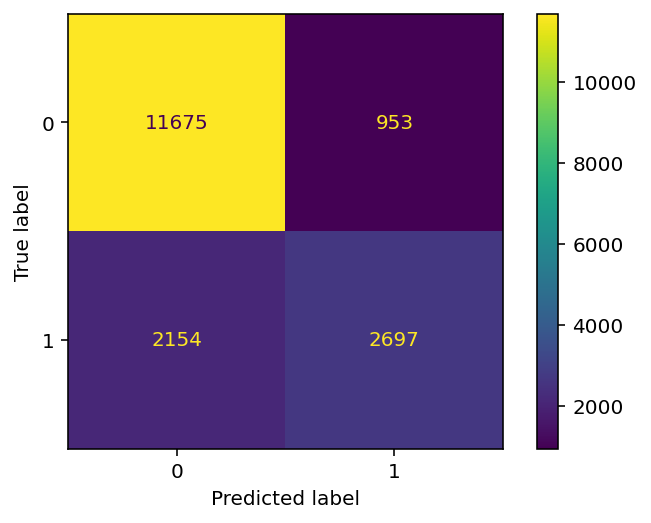

In [52]:
#random forest grid가 결과면에서 제일 우수하므로 해당 모델을 체택.
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe_grid,X_test,y_test,values_format='.0f')

In [53]:
#permutation importance to grid model

permuter = PermutationImportance(
    pipe_grid.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=5, 
    random_state=2
)
permuter.fit(X_val_transformed, y_val);

feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.0583 ± 0.0052,total_of_special_requests
0.0477 ± 0.0047,agent
0.0325 ± 0.0025,lead_time
0.0180 ± 0.0013,customer_type
0.0153 ± 0.0008,previous_cancellations
0.0151 ± 0.0021,required_car_parking_spaces
0.0094 ± 0.0006,deposit_type
0.0074 ± 0.0027,market_segment
0.0065 ± 0.0014,assigned_room_type
0.0058 ± 0.0024,booking_changes


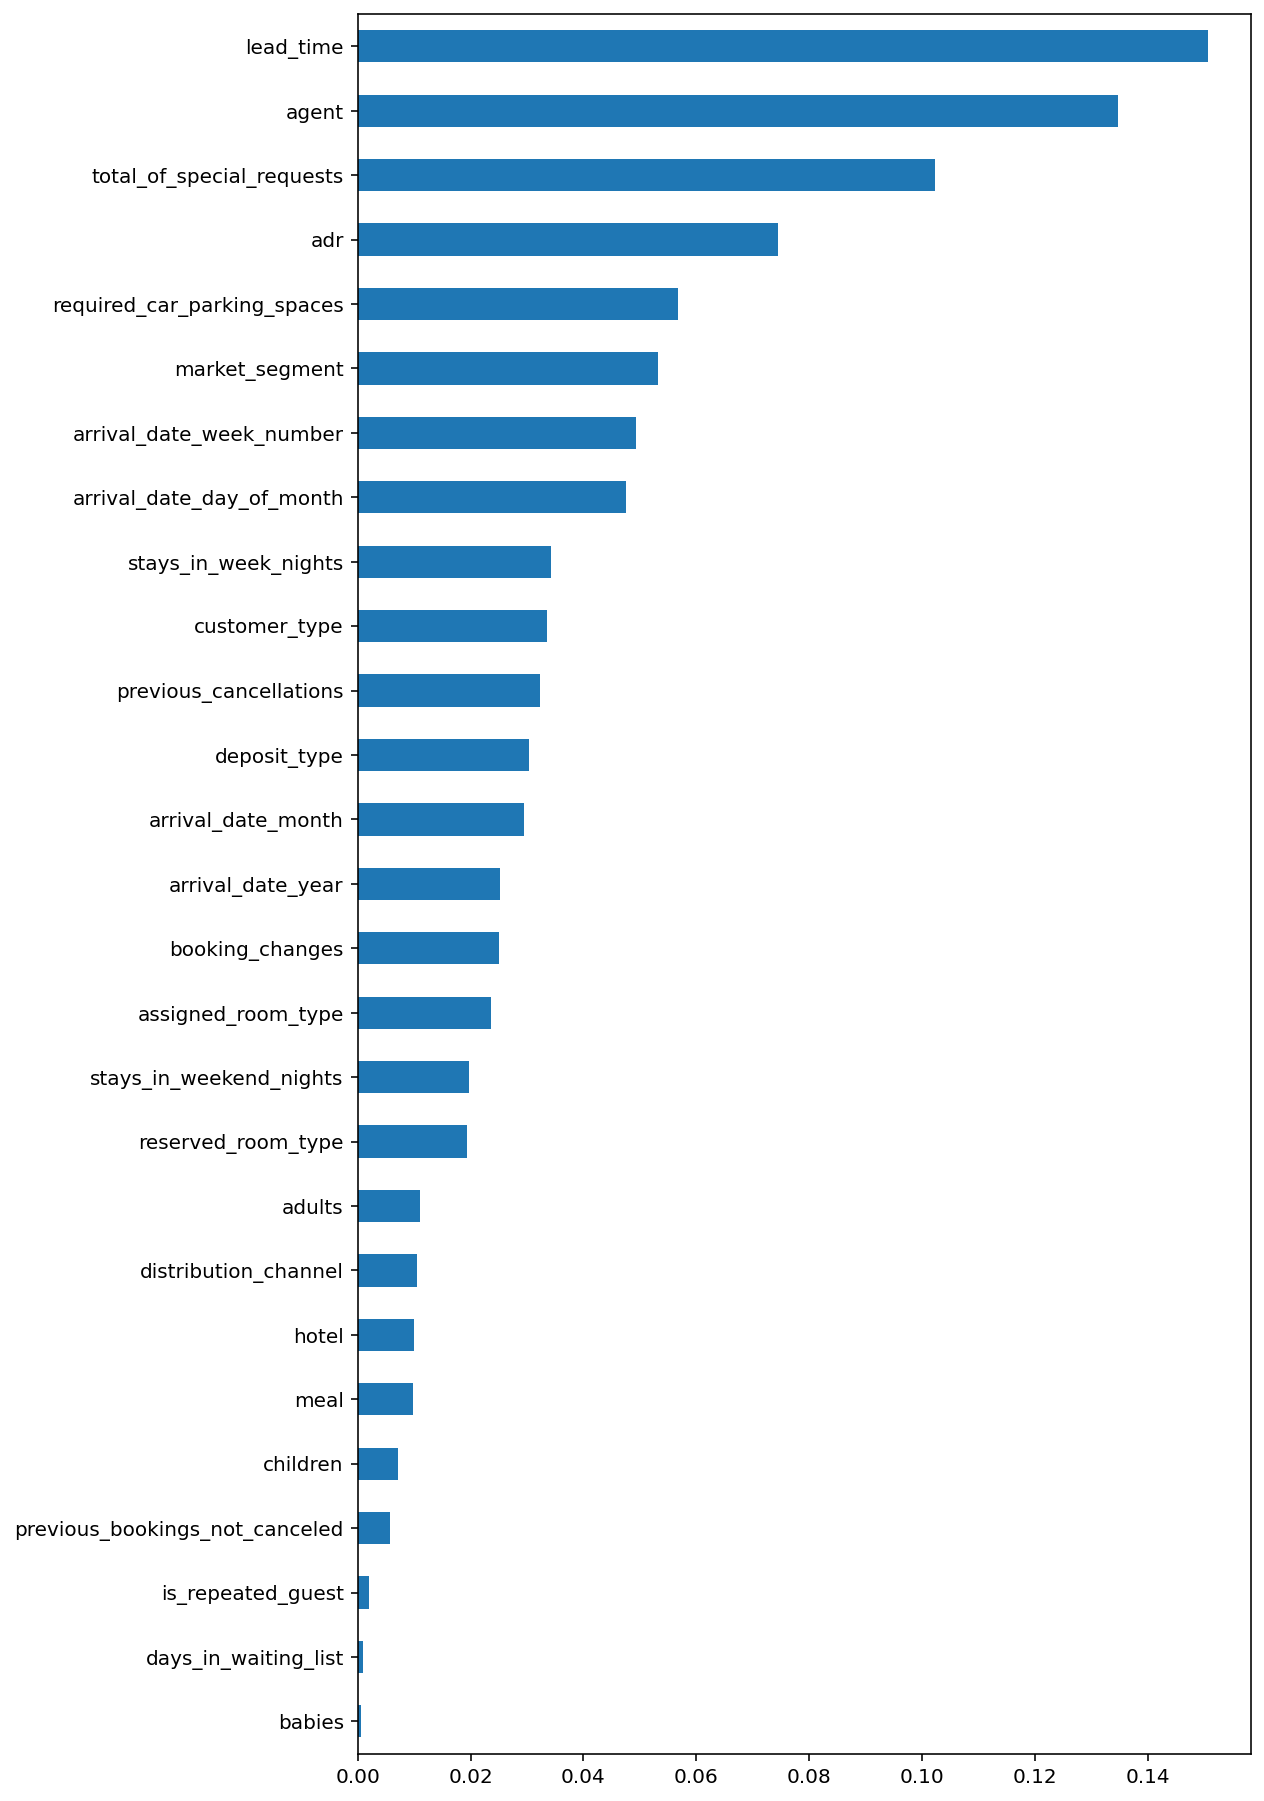

In [54]:
#feature importance

importances = pd.Series(pipe_grid.named_steps['rf'].feature_importances_, X_train.columns)
plt.figure(figsize=[8,16])
importances.sort_values().plot.barh();


In [61]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

isolated = pdp_isolate(
    model=pipe_grid, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=['agent'],
)

ValueError: ignored

In [ ]:
pdp_plot(isolated, feature_name=feature);


In [1]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

interaction = pdp_interact(
    model=pipe_grid,
    dataset=X_val,
    model_features=X_val.columns, 
    features=['lead_time','total_of_special_requests']
)

ModuleNotFoundError: ignored

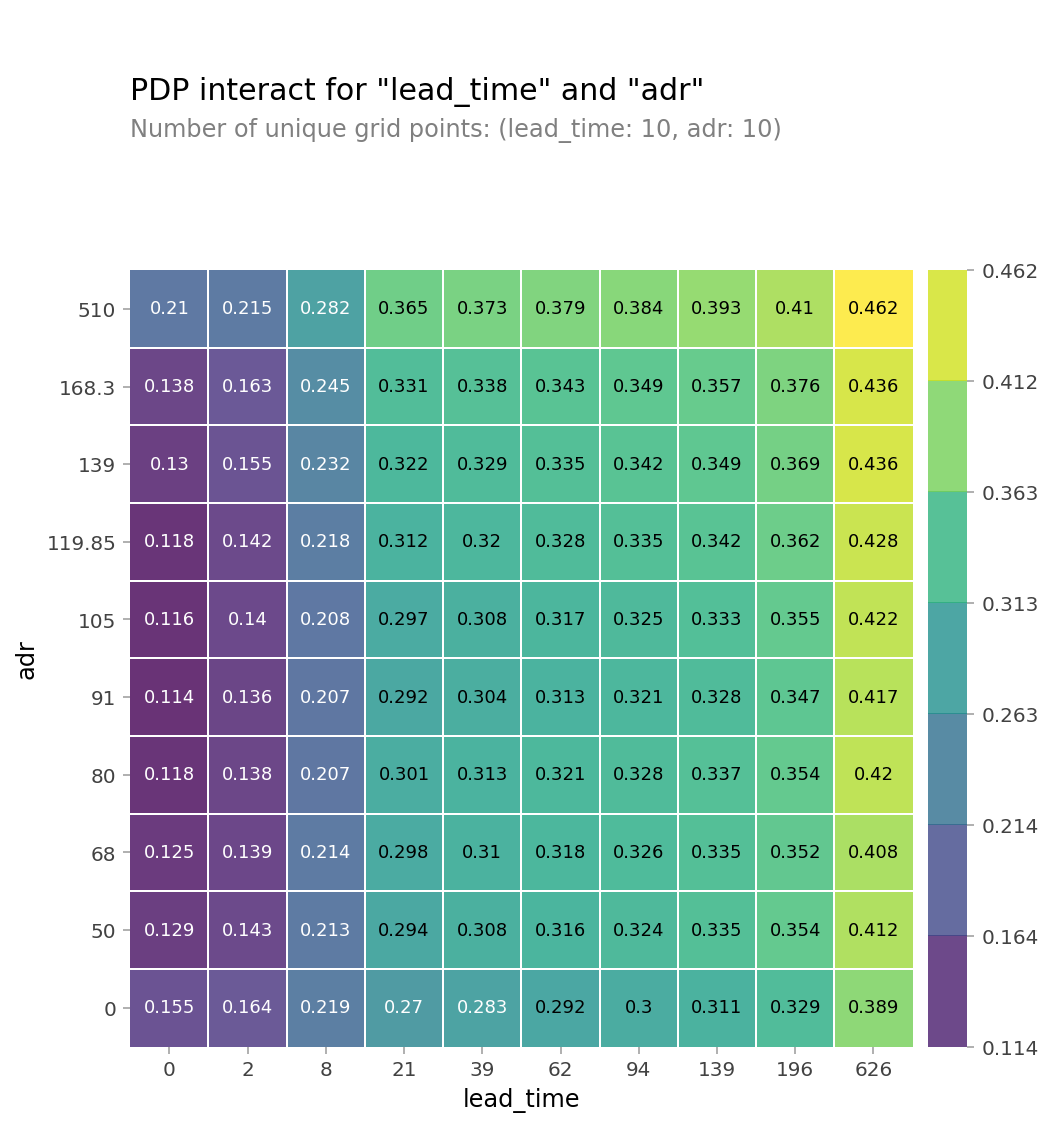

In [65]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=['lead_time','total_of_special_requests']);